In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Build Time Series

In [2]:
# Import TAVG
tavg = pd.read_csv('../data/NOAA_TAVG.csv')
tavg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
DATE    147 non-null int64
TAVG    147 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [3]:
tavg.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [4]:
tavg.set_index('DATE', inplace=True, drop=True)
tavg.index = pd.to_datetime(tavg.index, format='%Y')
tavg.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


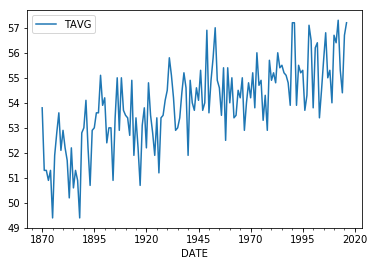

In [5]:
tavg.plot()

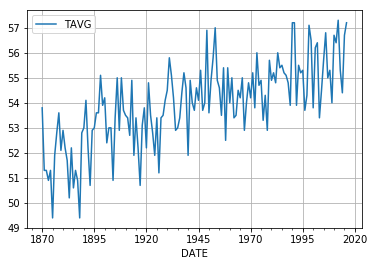

In [6]:
tavg.plot(grid=True)

In [7]:
tavg['2000']

,TAVG
DATE,
2000-01-01,53.8


In [8]:
tavg = tavg.assign(percent_change=tavg['TAVG'].pct_change())
tavg = tavg.assign(difference=tavg['TAVG'].diff())
tavg.head()

,TAVG,percent_change,difference
DATE,,,
1870-01-01,53.8,NaN,NaN
1871-01-01,51.3,-0.046468,-2.5
1872-01-01,51.3,0.000000,0.0
1873-01-01,50.9,-0.007797,-0.4
1874-01-01,51.3,0.007859,0.4


In [9]:
tavg['TAVG'].autocorr()

0.57054784315964913

# Merging

In [10]:
amzn = pd.read_csv('../data/AMZN.csv')
amzn.set_index('Date', inplace=True, drop=True)
amzn.index = pd.to_datetime(amzn.index)
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5088 entries, 1997-05-15 to 2017-08-02
Data columns (total 1 columns):
Adj Close    5088 non-null float64
dtypes: float64(1)
memory usage: 79.5 KB


In [11]:
amzn.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [12]:
msft = pd.read_csv('../data/MSFT.csv')
msft.set_index('Date', inplace=True, drop=True)
msft.index = pd.to_datetime(msft.index)
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [13]:
msft.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [14]:
# Find dates in amzn & msft
amzn_dates_set = set(amzn.index)
msft_dates_set = set(msft.index)

# Dates with amzn but not msft
print('amzn - msft:', amzn_dates_set - msft_dates_set)

amzn - msft: {Timestamp('2001-04-02 00:00:00'), Timestamp('2005-06-17 00:00:00'), Timestamp('2002-09-05 00:00:00'), Timestamp('2009-10-20 00:00:00'), Timestamp('1999-11-02 00:00:00'), Timestamp('2004-12-23 00:00:00'), Timestamp('2008-05-13 00:00:00'), Timestamp('2009-09-18 00:00:00'), Timestamp('2008-01-22 00:00:00'), Timestamp('2009-07-20 00:00:00'), Timestamp('2009-09-23 00:00:00'), Timestamp('2000-04-03 00:00:00'), Timestamp('2011-09-13 00:00:00'), Timestamp('1998-08-31 00:00:00'), Timestamp('2000-07-13 00:00:00'), Timestamp('2005-07-28 00:00:00'), Timestamp('2007-04-26 00:00:00'), Timestamp('2003-02-05 00:00:00'), Timestamp('2011-03-01 00:00:00'), Timestamp('1999-03-12 00:00:00'), Timestamp('2002-06-17 00:00:00'), Timestamp('2010-03-04 00:00:00'), Timestamp('2009-12-23 00:00:00'), Timestamp('2001-01-03 00:00:00'), Timestamp('2002-02-08 00:00:00'), Timestamp('2007-02-22 00:00:00'), Timestamp('2011-08-17 00:00:00'), Timestamp('2000-05-09 00:00:00'), Timestamp('2008-11-24 00:00:00'), 

Join: https://stackoverflow.com/questions/26645515/pandas-join-issue-columns-overlap-but-no-suffix-specified

In [15]:
# amzn_msft = amzn.join(msft, how='inner')
# amzn_msft.info()

In [16]:
amzn_msft = pd.merge(amzn, msft, how='outer', left_index=True, right_index=True)
amzn_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5090 entries, 1997-05-15 to 2017-08-04
Data columns (total 2 columns):
Adj Close_x    5088 non-null float64
Adj Close_y    1258 non-null float64
dtypes: float64(2)
memory usage: 119.3 KB


In [17]:
amzn_msft.tail()

,Adj Close_x,Adj Close_y
Date,,
2017-07-31,987.780029,72.699997
2017-08-01,996.190002,72.580002
2017-08-02,995.890015,72.260002
2017-08-03,NaN,72.150002
2017-08-04,NaN,72.680000


In [18]:
amzn_msft.columns = ["amzn", "msft"]
amzn_msft.tail()

,amzn,msft
Date,,
2017-07-31,987.780029,72.699997
2017-08-01,996.190002,72.580002
2017-08-02,995.890015,72.260002
2017-08-03,NaN,72.150002
2017-08-04,NaN,72.680000


In [19]:
# Get percent change
returns = amzn_msft.pct_change()
returns.tail()

,amzn,msft
Date,,
2017-07-31,-0.031626,-0.004655
2017-08-01,0.008514,-0.001651
2017-08-02,-0.000301,-0.004409
2017-08-03,0.000000,-0.001522
2017-08-04,0.000000,0.007346


In [20]:
# Broadcast percent change
amzn_msft['amzn_pc'] = amzn_msft['amzn'].pct_change()
amzn_msft['msft_pc'] = amzn_msft['msft'].pct_change()
amzn_msft.tail()

,amzn,msft,amzn_pc,msft_pc
Date,,,,
2017-07-31,987.780029,72.699997,-0.031626,-0.004655
2017-08-01,996.190002,72.580002,0.008514,-0.001651
2017-08-02,995.890015,72.260002,-0.000301,-0.004409
2017-08-03,NaN,72.150002,0.000000,-0.001522
2017-08-04,NaN,72.680000,0.000000,0.007346


In [21]:
# Get correlation
amzn_msft['amzn_pc'].corr(amzn_msft['msft_pc'])

0.37785661363601447

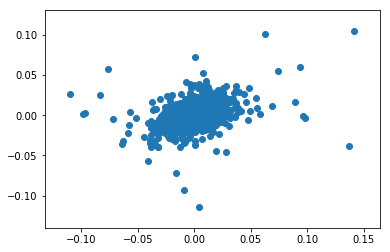

In [22]:
plt.scatter(amzn_msft['amzn_pc'], amzn_msft['msft_pc'])
plt.show()

# Regression

In [23]:
import statsmodels.api as sm

In [24]:
amzn_msft = sm.add_constant(amzn_msft)

In [25]:
amzn_msft.tail()

,const,amzn,msft,amzn_pc,msft_pc
Date,,,,,
2017-07-31,1.0,987.780029,72.699997,-0.031626,-0.004655
2017-08-01,1.0,996.190002,72.580002,0.008514,-0.001651
2017-08-02,1.0,995.890015,72.260002,-0.000301,-0.004409
2017-08-03,1.0,NaN,72.150002,0.000000,-0.001522
2017-08-04,1.0,NaN,72.680000,0.000000,0.007346


In [26]:
amzn_msft = amzn_msft.dropna()
amzn_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2012-08-07 to 2017-08-02
Data columns (total 5 columns):
const      1255 non-null float64
amzn       1255 non-null float64
msft       1255 non-null float64
amzn_pc    1255 non-null float64
msft_pc    1255 non-null float64
dtypes: float64(5)
memory usage: 58.8 KB


In [27]:
amzn_msft.head()

,const,amzn,msft,amzn_pc,msft_pc
Date,,,,,
2012-08-07,1.0,236.559998,26.377876,0.010983,0.010350
2012-08-08,1.0,234.380005,26.438896,-0.009215,0.002313
2012-08-09,1.0,234.059998,26.587088,-0.001365,0.005605
2012-08-10,1.0,232.750000,26.517351,-0.005597,-0.002623
2012-08-13,1.0,232.440002,26.491201,-0.001332,-0.000986


In [28]:
results = sm.OLS(amzn_msft['msft_pc'], amzn_msft[['const','amzn_pc']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                msft_pc   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 29 Jul 2018   Prob (F-statistic):           6.99e-44
Time:                        18:02:10   Log-Likelihood:                 3656.5
No. Observations:                1255   AIC:                            -7309.
Df Residuals:                    1253   BIC:                            -7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.410      0.1

# Autocorrelation function (ACF)

In [29]:
# Daily change in msft price
msft_daily = msft.copy()
msft_daily['change_rate'] = msft.diff()
print('The autocorrelation of daily interest rate changes is %4.2f' %(msft_daily['change_rate'].autocorr()))

The autocorrelation of daily interest rate changes is 0.00


In [30]:
# Convert data to annual data
msft_annual = msft.resample(rule='A', how='last')
msft_annual['change_rate'] = msft_annual.diff()
print('The autocorrelation of annual price changes is %4.2f' %(msft_annual['change_rate'].autocorr()))

The autocorrelation of annual price changes is -0.78


/home/anonymous/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


In [31]:
msft_week = msft.resample(rule='w', how='last')
returns = msft_week.pct_change()
print("The autocorrelation of weekly returns is %4.2f" %(returns['Adj Close'].autocorr()))

The autocorrelation of weekly returns is -0.16


/home/anonymous/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


In [32]:
from statsmodels.graphics.tsaplots import plot_acf

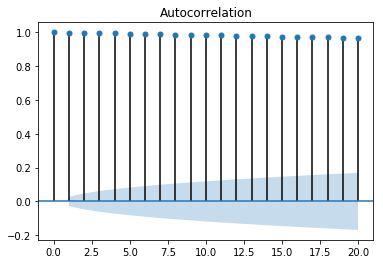

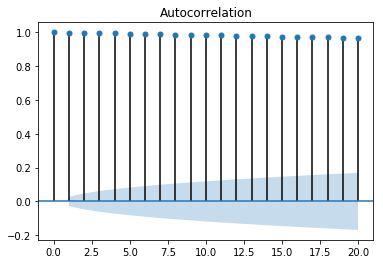

In [33]:
plot_acf(amzn, lags=20, alpha=0.05)

In [34]:
from statsmodels.tsa.stattools import acf

In [35]:
print(acf(amzn))

[ 1.          0.99832485  0.99664308  0.9949939   0.99325458  0.99143868
  0.98959781  0.98780755  0.98602265  0.98428051  0.98251203  0.98075127
  0.97898956  0.97729077  0.97561777  0.97395206  0.97227474  0.97062829
  0.9689624   0.96734192  0.96575617  0.96413962  0.96259378  0.96100578
  0.95936772  0.95766635  0.95599855  0.95428846  0.95254723  0.95081599
  0.94911487  0.94745289  0.94579533  0.94415015  0.9425648   0.94092076
  0.93924806  0.93762196  0.93596238  0.93420978  0.9324679 ]


# White noise

In [36]:
import numpy as np

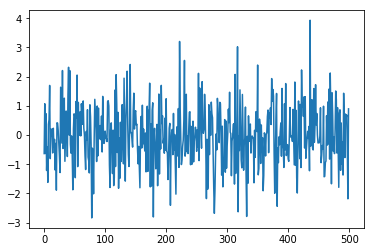

In [37]:
noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)

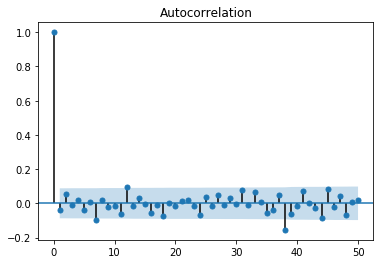

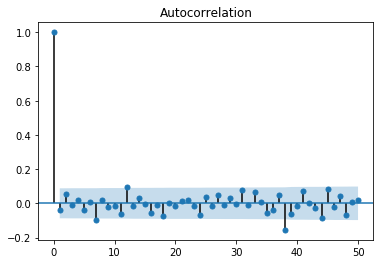

In [38]:
plot_acf(noise, lags=50)

# Random Walk

## Augmented Dickey-Fuller (ADF) test

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
results = adfuller(msft['Adj Close'])
print('p-value:', results[1])
print('full result:', results)

p-value: 0.971120885237
full result: (0.18006177841534224, 0.97112088523696893, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.8638420633876671, '10%': -2.567995644141416}, 2279.300324698148)


# Stationary

## Transform nonstationary to stationary series

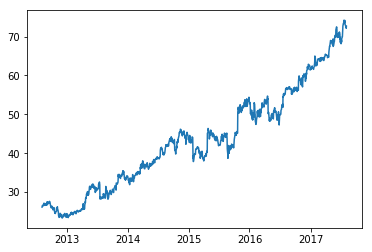

In [41]:
# Random walk
plt.plot(msft)

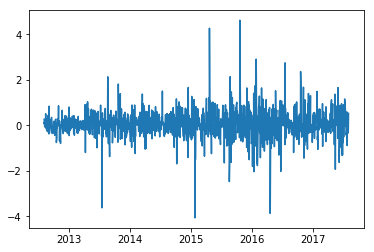

In [42]:
# 1st diff
plt.plot(msft.diff())

In [43]:
# Time series with seasonality
hrb = pd.read_csv('../data/HRB.csv', index_col='Quarter')
hrb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2007Q1 to 2017Q4
Data columns (total 1 columns):
Earnings    44 non-null float64
dtypes: float64(1)
memory usage: 704.0+ bytes


In [44]:
hrb.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


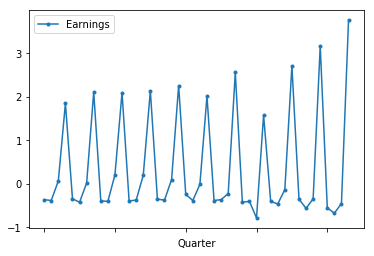

In [45]:
hrb.plot(style='.-')

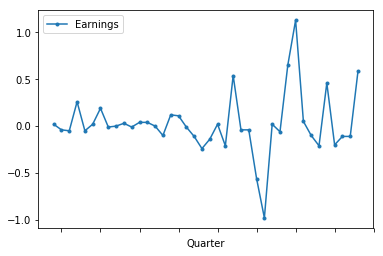

In [46]:
# Seasonal diff
hrb.diff(4).plot(style='.-')

/home/anonymous/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


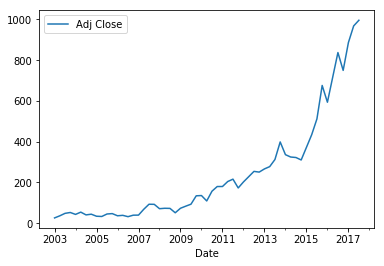

In [47]:
amzn_quarter = amzn.resample(rule='Q', how='last')
amzn_quarter['2003':].plot()

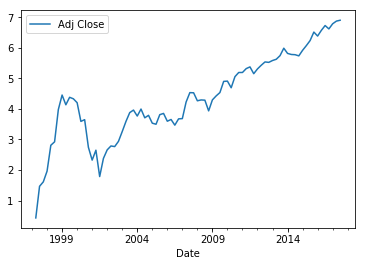

In [48]:
np.log(amzn_quarter).plot()

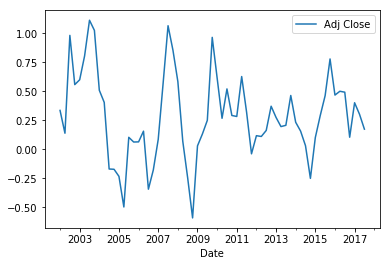

In [49]:
np.log(amzn_quarter['2001':]).diff(4).plot()